In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [4]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [7]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

In [8]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.0794 - accuracy: 0.4222 - val_loss: 1.0025 - val_accuracy: 0.6000 - 1s/epoch - 358ms/step
Epoch 2/200
3/3 - 0s - loss: 0.9716 - accuracy: 0.7000 - val_loss: 0.8900 - val_accuracy: 1.0000 - 40ms/epoch - 13ms/step
Epoch 3/200
3/3 - 0s - loss: 0.8696 - accuracy: 0.8889 - val_loss: 0.7565 - val_accuracy: 0.7667 - 37ms/epoch - 12ms/step
Epoch 4/200
3/3 - 0s - loss: 0.7549 - accuracy: 0.6889 - val_loss: 0.6499 - val_accuracy: 0.9667 - 38ms/epoch - 13ms/step
Epoch 5/200
3/3 - 0s - loss: 0.6391 - accuracy: 0.9222 - val_loss: 0.5258 - val_accuracy: 0.9667 - 95ms/epoch - 32ms/step
Epoch 6/200
3/3 - 0s - loss: 0.5223 - accuracy: 0.8667 - val_loss: 0.4122 - val_accuracy: 0.8667 - 87ms/epoch - 29ms/step
Epoch 7/200
3/3 - 0s - loss: 0.4390 - accuracy: 0.8778 - val_loss: 0.3894 - val_accuracy: 0.9000 - 50ms/epoch - 17ms/step
Epoch 8/200
3/3 - 0s - loss: 0.3762 - accuracy: 0.9111 - val_loss: 0.3045 - val_accuracy: 0.9667 - 35ms/epoch - 12ms/step
Epoch 9/200
3/3 - 0s - lo

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

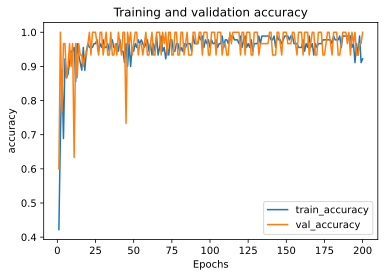

In [11]:
plot_metric(history, 'accuracy')

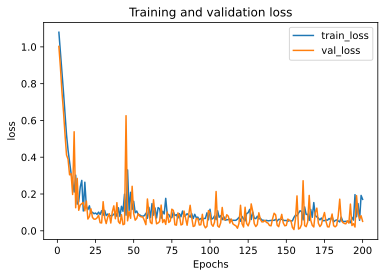

In [12]:
plot_metric(history, 'loss')

In [13]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0687 - accuracy: 1.0000 - 13ms/epoch - 13ms/step


[0.0686984732747078, 1.0]

In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [15]:
def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [16]:
model = create_regularized_model(1e-5, 0.3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [17]:
# First configure model using model.compile()
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
# Then, train the model with fit()
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.3191 - accuracy: 0.3222 - val_loss: 1.1267 - val_accuracy: 0.2333 - 1s/epoch - 468ms/step
Epoch 2/200
3/3 - 0s - loss: 1.2011 - accuracy: 0.2889 - val_loss: 1.1102 - val_accuracy: 0.2333 - 30ms/epoch - 10ms/step
Epoch 3/200
3/3 - 0s - loss: 1.1400 - accuracy: 0.3556 - val_loss: 1.0924 - val_accuracy: 0.7667 - 43ms/epoch - 14ms/step
Epoch 4/200
3/3 - 0s - loss: 1.1501 - accuracy: 0.2778 - val_loss: 1.0863 - val_accuracy: 0.4000 - 84ms/epoch - 28ms/step
Epoch 5/200
3/3 - 0s - loss: 1.1039 - accuracy: 0.3778 - val_loss: 1.0769 - val_accuracy: 0.4000 - 55ms/epoch - 18ms/step
Epoch 6/200
3/3 - 0s - loss: 1.1232 - accuracy: 0.3111 - val_loss: 1.0702 - val_accuracy: 0.4000 - 55ms/epoch - 18ms/step
Epoch 7/200
3/3 - 0s - loss: 1.1186 - accuracy: 0.3333 - val_loss: 1.0654 - val_accuracy: 0.7667 - 44ms/epoch - 15ms/step
Epoch 8/200
3/3 - 0s - loss: 1.1050 - accuracy: 0.3222 - val_loss: 1.0604 - val_accuracy: 0.7667 - 44ms/epoch - 15ms/step
Epoch 9/200
3/3 - 0s - lo

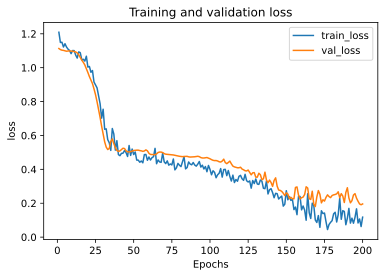

In [ ]:
plot_metric(history, 'loss')

In [18]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1043 - accuracy: 0.9333 - 14ms/epoch - 14ms/step


[0.10431118309497833, 0.9333333373069763]